# Student Densities by Neighborhood

In [1]:
#import libraries 
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
#open addresses csv 
df = pd.read_csv("addresses.csv")

df.head()

C:\Users\shery\AppData\Local\Temp\ipykernel_28216\2405440256.py:2: DtypeWarning: Columns (4,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("addresses.csv")


,6a. street #,6b. street name,6c. street suffix,6d. unit #,6e. zip,7. undergraduate (u) or graduate (g),8. full-time (ft) or part-time (pt),9. at-home or not-at-home,9. 5 or more undergrads/unit (y/n),university,year
0,10,Higgins,ST,NaN,2134,U,FT,NaN,NaN,Emmanuel College,2018-2019
1,10,Higgins,ST,NaN,2134,U,FT,NaN,NaN,Emmanuel College,2018-2019
2,1189,Commonwealth,AVE,6,2134,U,FT,NaN,NaN,Emmanuel College,2018-2019
3,12,Glenville,AVE,NaN,2134,U,FT,NaN,NaN,Emmanuel College,2018-2019
4,12,Glenville,AVE,1,2134,U,FT,NaN,NaN,Emmanuel College,2018-2019


In [3]:
#extract zipcodes
df_zip = df[["6e. zip"]]

def zip_standard(zip): 
    if pd.isna(zip):
        return ""

    zip = str(zip).strip()

    if len(zip) >= 5:
        zip = zip[:5]
        if zip[-1] == ".":
            zip = zip[:-1]
    if len(zip) == 4:
        zip = "0" + zip 
    return zip

#apply zip_standard to the correct zipcode format: 
df_zip["6e. zip"] = df_zip["6e. zip"].apply(zip_standard)
#rename column to something better!!!!: 
df_zip = df_zip.rename(columns={"6e. zip": "Zipcode"})
df_zip.head()



C:\Users\shery\AppData\Local\Temp\ipykernel_28216\3964199931.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zip["6e. zip"] = df_zip["6e. zip"].apply(zip_standard)


,Zipcode
0,02134
1,02134
2,02134
3,02134
4,02134


In [4]:
'''
NOTES :
    counts the num occurances for each zip code, and then matches it to the zipcode 
    value_counts only works on a series, we want to "reset" the series so it matches the df 
'''
df_pop_zip = df_zip["Zipcode"].value_counts().reset_index() 

df_pop_zip.head()

,Zipcode,count
0,02134,37260
1,02115,35951
2,02215,34218
3,02135,33230
4,02120,28019


In [5]:
df_zip_names = pd.read_csv("zippies.csv")

#standardize zipcodes using zip_standard
df_zip_names["Zipcode"] = df_zip_names["Zipcode"].apply(zip_standard)

df_zip_names.head()


,Neighborhood,Zipcode
0,Allston,02134
1,Back Bay/Bay Village/Theater District,02116
2,Beacon Hill,02108
3,Brighton,02135
4,Charlestown,02129


In [6]:
df_zip_name_pop = pd.merge(df_pop_zip, df_zip_names, on="Zipcode", how="inner")
df_zip_name_pop.head()

#combine dorchesters bc multiple zipcodes for Dorchester
new_row = pd.DataFrame({"Neighborhood" : "Dorchester", "Zipcode": "0225/02124/02122/02121", "count" : [20108] })
df_zip_name_pop = pd.concat([df_zip_name_pop, new_row], ignore_index=True)
df_zip_name_pop = df_zip_name_pop.drop([14,7, 16, 19]) #drop old dorchesters 
print(df_zip_name_pop)

                   Zipcode  count                           Neighborhood
0                    02134  37260                                Allston
1                    02115  35951                  Longwood Medical Area
2                    02215  34218                         Fenway/Kenmore
3                    02135  33230                               Brighton
4                    02120  28019                           Mission Hill
5                    02118  14351                              South End
6                    02130  12690                          Jamaica Plain
8                    02119   9151                                Roxbury
9                    02116   7754  Back Bay/Bay Village/Theater District
10                   02128   7335                            East Boston
11                   02111   6956             Chinatown/Leather District
12                   02114   6316                               West End
13                   02127   4128                  

In [7]:
#get neighborhood sizes from other csv!!!
df_shapes = pd.read_csv("Boston_Neighborhood_Boundaries.csv")

#choose sqmiles and name columns
df_size = df_shapes[["sqmiles", "name"]] 

#combine neighborhoods that share zipcodes 
new_row1 = pd.DataFrame({"sqmiles": [0.66], "name" : "Back Bay/Bay Village/Theater District"})
new_row2 = pd.DataFrame({"sqmiles": [0.14], "name" : "Chinatown/Leather District"})

df_size = pd.concat([df_size, new_row1], ignore_index=True)
df_size = pd.concat([df_size, new_row2], ignore_index=True)

df_size.drop([4,5,6,14]) #drop old 

df_size = df_size.rename(columns={"name":"Neighborhood"})

print(df_size)

    sqmiles                           Neighborhood
0      2.51                             Roslindale
1      3.94                          Jamaica Plain
2      0.55                           Mission Hill
3      0.29                               Longwood
4      0.04                            Bay Village
5      0.02                       Leather District
6      0.12                              Chinatown
7      0.20                              North End
8      3.29                                Roxbury
9      0.74                              South End
10     0.62                               Back Bay
11     4.71                            East Boston
12     1.36                            Charlestown
13     0.30                               West End
14     0.31                            Beacon Hill
15     0.62                               Downtown
16     0.88                                 Fenway
17     2.88                               Brighton
18     5.49                    

In [8]:
df_merged = pd.merge(df_size, df_zip_name_pop, on="Neighborhood", how="inner")
print(df_merged)

    sqmiles                           Neighborhood                 Zipcode  \
0      2.51                             Roslindale                   02131   
1      3.94                          Jamaica Plain                   02130   
2      0.55                           Mission Hill                   02120   
3      0.20                              North End                   02113   
4      3.29                                Roxbury                   02119   
5      0.74                              South End                   02118   
6      4.71                            East Boston                   02128   
7      1.36                            Charlestown                   02129   
8      0.30                               West End                   02114   
9      0.31                            Beacon Hill                   02108   
10     2.88                               Brighton                   02135   
11     5.49                           West Roxbury              

In [9]:
#calculate densities
density = []
for _, row in df_merged.iterrows():
    density.append(float(row[3])/row[0])

density_series = pd.Series(density)
df_merged["density"] = density_series
df_merged.head()

C:\Users\shery\AppData\Local\Temp\ipykernel_28216\620460032.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  density.append(float(row[3])/row[0])


,sqmiles,Neighborhood,Zipcode,count,density
0,2.51,Roslindale,02131,2498,995.219124
1,3.94,Jamaica Plain,02130,12690,3220.812183
2,0.55,Mission Hill,02120,28019,50943.636364
3,0.20,North End,02113,3125,15625.000000
4,3.29,Roxbury,02119,9151,2781.458967


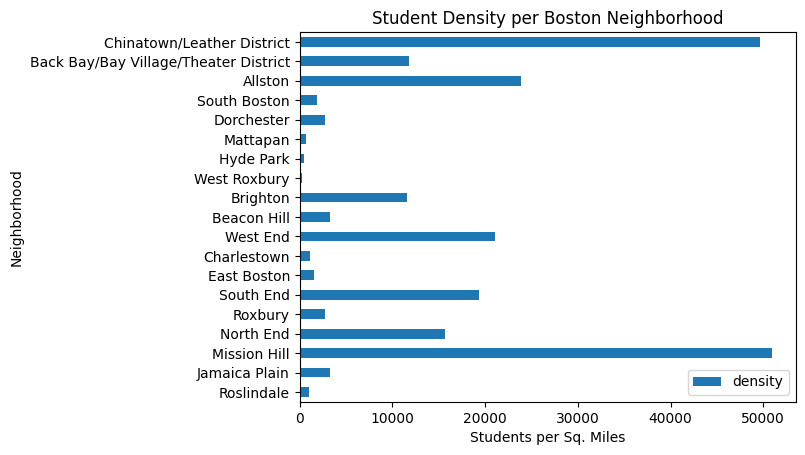

In [10]:
#PLOT PLOT PLOT !!!!
df_merged.plot(x= "Neighborhood", y="density", kind = "barh")
plt.title("Student Density per Boston Neighborhood")
plt.ylabel("Neighborhood")
plt.xlabel("Students per Sq. Miles")
plt.savefig("density_bar_graph")
plt.show()

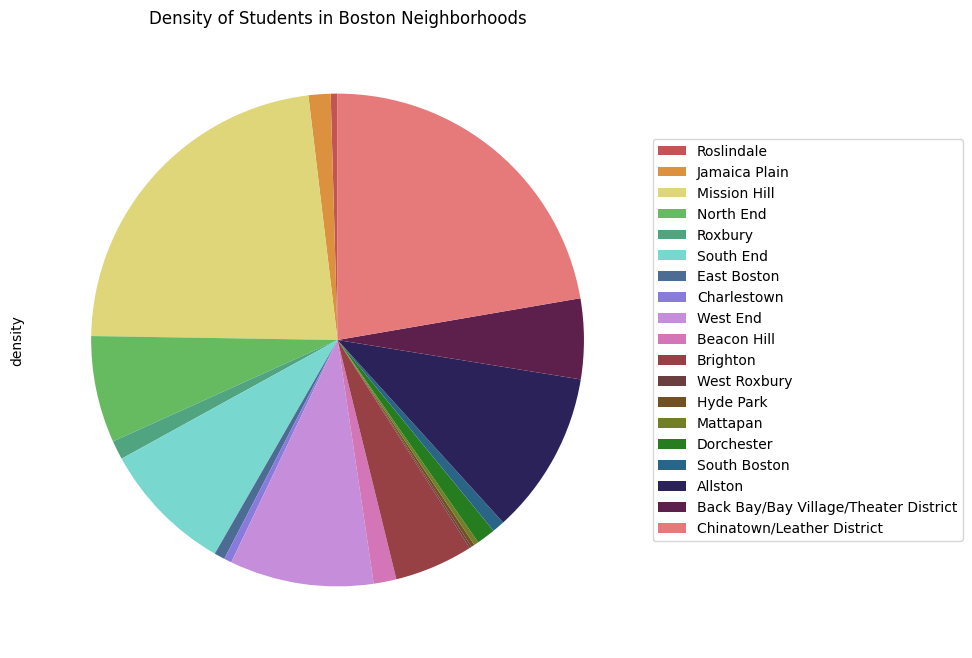

In [11]:
#PLOT PLOT PLOT !!!!
colors = ["#C35454","#db913e", "#dfd67a", "#66bb60", "#50a580", "#78d8d0", "#4d6c93", "#887bdc", "#c68ddb", "#d375b7", "#974144", "#6b3f3f", "#725025", "#747E27", "#267d20", "#2a6486", "#2c225a", "#5d204c", "#E67A7A", ]
plot = df_merged.plot.pie(y='density', labels=None, figsize=(8, 8),colors = colors, startangle=90)
plt.legend(
    labels=df_merged['Neighborhood'],
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)
plt.title('Density of Students in Boston Neighborhoods')
#plt.ylabel('') # Remove the default 'Value' label on the y-axis
plt.savefig("density_pie_chart")
plt.show()